In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-03-08 12:32:58.128923: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 12:32:58.128984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 12:32:58.130200: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 12:32:58.137066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 12:32:59.259870: W tensorflow/compiler/tf2

In [2]:
# Define the paths to your dataset
train_dir = '/home/alienblade/College Stuff/Workspace/AI/Master Folder/train'
validation_dir = '/home/alienblade/College Stuff/Workspace/AI/Master Folder/valid'
test_dir = '/home/alienblade/College Stuff/Workspace/AI/Master Folder/test'
# Define image dimensions
img_height = 150
img_width = 150
batch_size = 32

In [3]:
# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load and preprocess the dataset
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_data = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [5]:
# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: Happy, Angry, Sad, Others
])


2024-03-08 12:33:10.578469: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 12:33:10.606600: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 12:33:10.606784: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=20,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batch_size
)

Epoch 1/20


2024-03-08 12:33:14.026870: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-08 12:33:14.142896: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-08 12:33:14.872540: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-08 12:33:14.933862: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f924cc0f0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-08 12:33:14.933889: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-03-08 12:33:14.939289: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709881395.031299   23489 device_compiler.

31/31 [==============================] - 8s 140ms/step - loss: 1.3873 - accuracy: 0.2490 - val_loss: 1.3822 - val_accuracy: 0.2500
Epoch 2/20
31/31 [==============================] - 6s 179ms/step - loss: 1.3865 - accuracy: 0.2510 - val_loss: 1.3860 - val_accuracy: 0.1875
Epoch 3/20
31/31 [==============================] - 5s 156ms/step - loss: 1.3843 - accuracy: 0.2562 - val_loss: 1.3877 - val_accuracy: 0.2188
Epoch 4/20
31/31 [==============================] - 4s 138ms/step - loss: 1.3793 - accuracy: 0.2655 - val_loss: 1.3805 - val_accuracy: 0.3125
Epoch 5/20
31/31 [==============================] - 4s 140ms/step - loss: 1.3759 - accuracy: 0.2820 - val_loss: 1.3710 - val_accuracy: 0.3125
Epoch 6/20
31/31 [==============================] - 4s 138ms/step - loss: 1.3713 - accuracy: 0.3048 - val_loss: 1.3732 - val_accuracy: 0.2188
Epoch 7/20
31/31 [==============================] - 4s 143ms/step - loss: 1.3818 - accuracy: 0.2996 - val_loss: 1.3772 - val_accuracy: 0.2500
Epoch 8/20
31/31 

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

# Save the model
model.save('pec_normal.h5')

2/2 [==============================] - 0s 436ms/step - loss: 1.4999 - accuracy: 0.2632
Test accuracy: 0.2631579041481018


/home/alienblade/College Stuff/Workspace/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Graphs

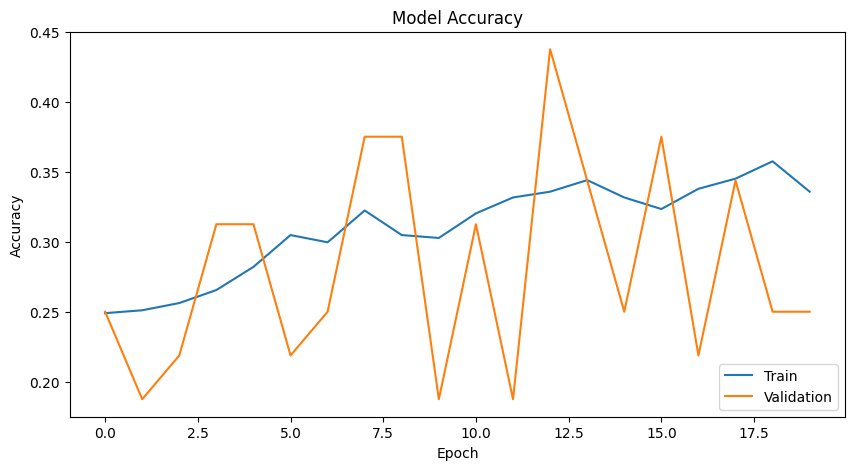

In [9]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


Found 38 images belonging to 4 classes.
2/2 [==============================] - 0s 7ms/step


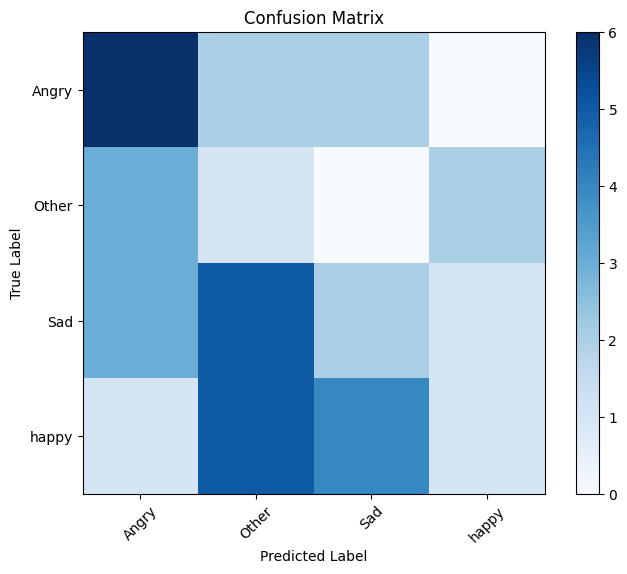

In [16]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = load_model('pec_normal.h5')

# Use ImageDataGenerator for data preprocessing (no augmentation for test data)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the test dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep data in the same order as labels
)

# Make predictions on the test dataset
y_pred = model.predict(test_data)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
true_labels = test_data.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_data.class_indices))
plt.xticks(tick_marks, test_data.class_indices, rotation=45)
plt.yticks(tick_marks, test_data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


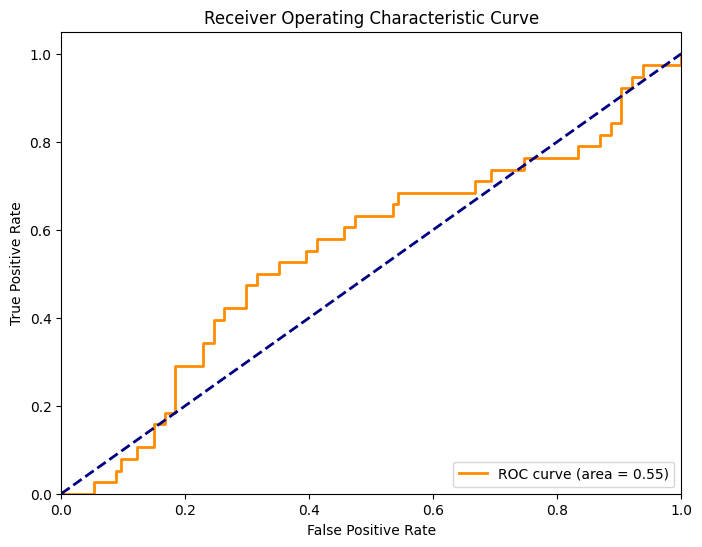

Found 38 images belonging to 4 classes.
2/2 [==============================] - 0s 7ms/step


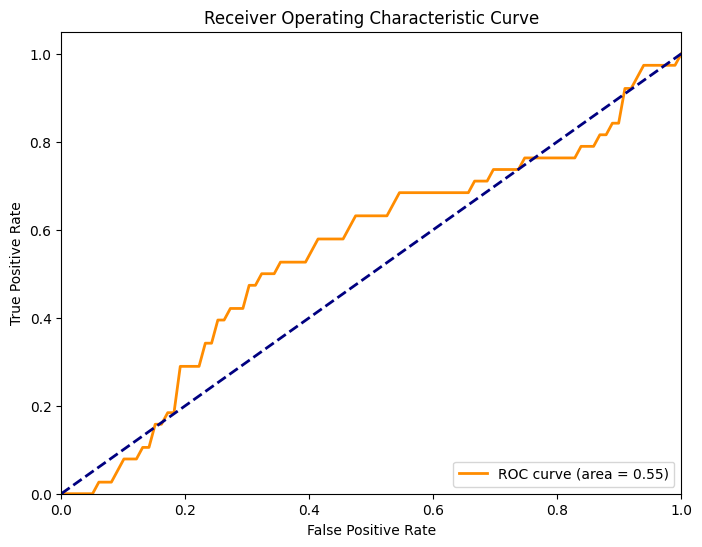

In [23]:
from sklearn.preprocessing import LabelBinarizer

# Convert multiclass labels to binary labels
lb = LabelBinarizer()
true_labels_bin = lb.fit_transform(true_labels)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels_bin.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()
# Load the saved model
model = load_model('pec_normal.h5')

# Use ImageDataGenerator for data preprocessing (no augmentation for test data)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the test dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep data in the same order as labels
)

# Make predictions on the test dataset
y_pred = model.predict(test_data)

# Get the true labels from the test dataset
true_labels = test_data.classes

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels_bin.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Interpolate the ROC curve for smoother plotting
fpr_interp = np.linspace(0, 1, 100)
tpr_interp = interp1d(fpr, tpr)(fpr_interp)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_interp, tpr_interp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


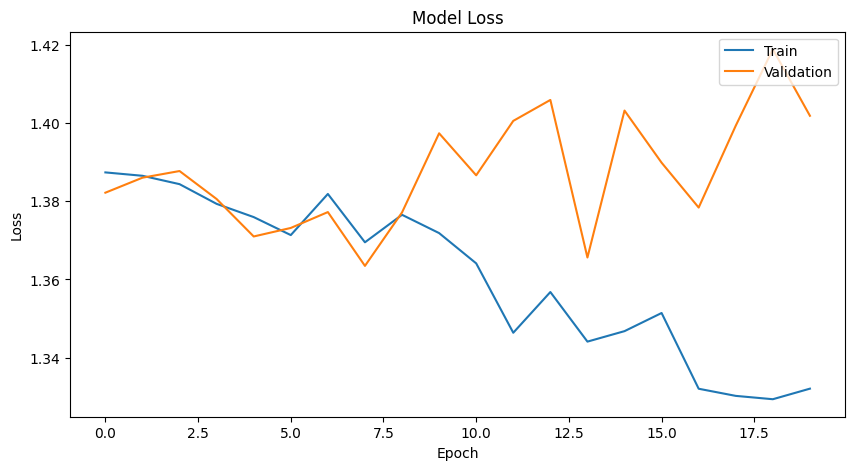

In [8]:

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()